In [11]:
import matplotlib
from biopandas.pdb import PandasPdb
from glob import glob
import os.path as osp
from tqdm import tqdm
import seaborn as sbn

In [12]:
data_path = '../data/raw'
pockets_path = osp.join(data_path, '*', '*_pocket.pdb')
list_pockets = glob(pockets_path)
print(len(list_pockets), "pockets")

19443 pockets


### Mean number of atoms per pocket

In [13]:
list_number_atoms_with_H = []
list_number_atoms_withOUT_H = []
for pocket_path in tqdm(list_pockets):
    ppdb = PandasPdb().read_pdb(pocket_path)
    list_number_atoms_with_H += [ppdb.df['ATOM'].shape[0]]
    list_number_atoms_withOUT_H += [ppdb.df['ATOM'][ppdb.df['ATOM']['element_symbol'] != 'H'].shape[0]]

100%|██████████| 19443/19443 [03:10<00:00, 102.06it/s]


[Text(0.5, 0, 'Number of Atoms'),
 Text(0, 0.5, 'Percent of pocket'),
 Text(0.5, 1.0, 'Mean number of atoms per pocket')]

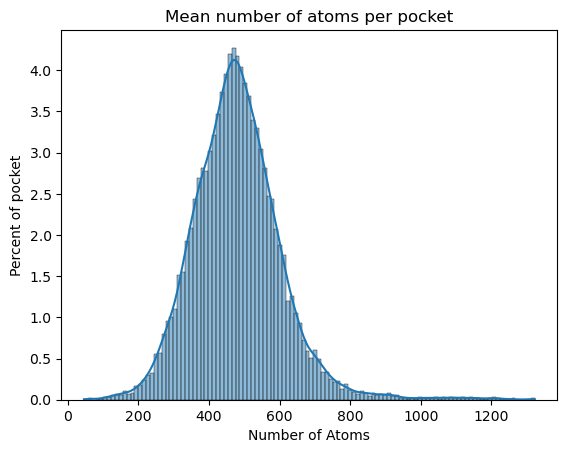

In [14]:
ax = sbn.histplot(data=list_number_atoms_with_H, stat='percent', kde=True)
ax.set(xlabel='Number of Atoms',
       ylabel='Percent of pocket',
       title='Mean number of atoms per pocket')

### Mean number of atoms per pocket Without H

[Text(0.5, 0, 'Number of Atoms'),
 Text(0, 0.5, 'Percent of pocket'),
 Text(0.5, 1.0, 'Mean number of atoms per pocket')]

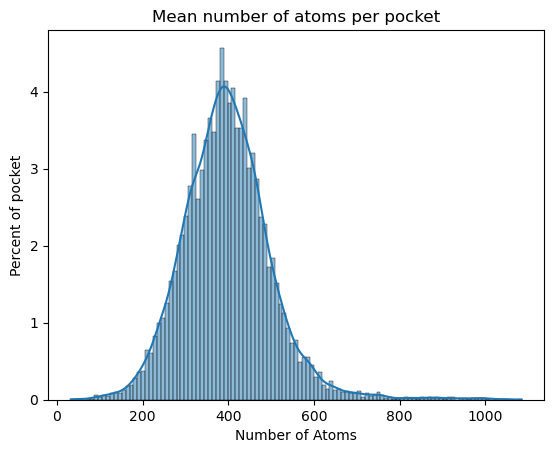

In [15]:
ax = sbn.histplot(data=list_number_atoms_withOUT_H, stat='percent', kde=True)
ax.set(xlabel='Number of Atoms',
       ylabel='Percent of pocket',
       title='Mean number of atoms per pocket')